<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
%matplotlib inline

Using TensorFlow backend.


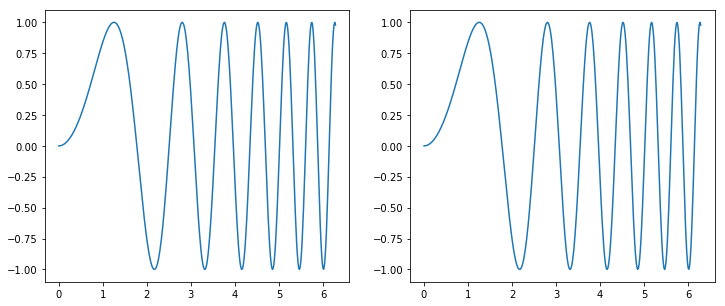

In [18]:
#First create some toy data:
import numpy as np
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

## Pregunta 1

**a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas**

In [2]:
df = pd.read_csv("EnergyMolecule/roboBohr.csv")
df.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total = len(df)

print(df.shape)
print(df.info())

dfTrain = df[:int(0.6*total)]
dfVal = df[int(0.6*total):int(0.85*total)]    
dfTest = df[int(0.85*total)::]

(16242, 1276)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1276 entries, 0 to Eat
dtypes: float64(1276)
memory usage: 158.1 MB
None


Los datos corresponden a un csv compuesto de 1276 columnas correspondientes a las variables, y 16242 filas que corresponden a las diferentes simulaciones.

Las columnas 'Unnamed: 0' y 'pubchem_id' se eliminan por no tener datos relevante para los conjuntos de entrenamiento, validación y testeo. 'Unnamed: 0' no es necesaria debido a que corresponde a una enumeración, y el dataframe de panda ya viene con una incluída. 'pubchem_id' no es necesaria tampoco pues corresponde a la ID de la simulación.

**a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento**

Para un mejor funcionamiento de los algoritmos de Machine learning, hay que normalizar las variables de entrada del algoritmo, Normalizar, hace referencia a extender o comprimir los valores de una variable para estar en un rango definido. Es decir, realiza una ponderación de las caracterisiticas de una mejor manera y ademas se reduce el facor de escala. Sin embargo, realizar una mala eleccion del metodo de normalización puede alterar los resultados del analisis de datos. En este caso, se realiza una estandarización de los datos, debido a que si usamos normalización los outlayers podrían causar un desbalance de los datos en el intervalo, haciendo que muchos de ellos se agrupen cerca del 0.0 y que el outlayer quede como -1 o 1.


In [3]:
#Pre-processing#

#x var's
xTrain = pd.DataFrame.copy(dfTrain)
xVal = pd.DataFrame.copy(dfVal)
xTest = pd.DataFrame.copy(dfTest)

#y var's
yTrain = xTrain.pop('Eat').values.reshape(-1, 1)
yVal = xVal.pop('Eat').values.reshape(-1, 1)
yTest = xTest.pop('Eat').values.reshape(-1, 1)

#Scaler
scaler = StandardScaler().fit(xTrain)

#All standarized
xTrainScaled = pd.DataFrame(scaler.transform(xTrain),columns=xTrain.columns)
xValScaled = pd.DataFrame(scaler.transform(xVal),columns=xVal.columns)
xTestScaled = pd.DataFrame(scaler.transform(xTest),columns=xTest.columns)

**b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

Se crea un la red feedward de 3 capas como se especifica, para luego graficar el error obtenido en el entrenamiento y en las pruebas.

In [4]:
numEpochs = 250
test_loss = np.zeros(numEpochs)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss = self.model.evaluate(x, y, verbose=0)
        test_loss[epoch-1] = loss
        print('\nTesting loss: {}'.format(loss))

In [7]:
model = Sequential()
model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']

history = model.fit(xTrainScaled.values,
                    yTrain,
                    epochs=numEpochs,
                    verbose=1,
                    validation_data=(xValScaled.values, yVal), 
                    callbacks=[TestCallback((xTestScaled.values, yTest))])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 6s 595us/step - loss: 1.4672 - val_loss: 0.5401

Testing loss: 0.5403369542487978
Epoch 2/250
9745/9745 [==============================] - 5s 524us/step - loss: 0.5976 - val_loss: 0.4224

Testing loss: 0.43395390870583855
Epoch 3/250
9745/9745 [==============================] - 4s 411us/step - loss: 0.4991 - val_loss: 0.3749

Testing loss: 0.36610294188149994
Epoch 4/250
9745/9745 [==============================] - 5s 466us/step - loss: 0.4307 - val_loss: 0.3376

Testing loss: 0.29767803466853227
Epoch 5/250
9745/9745 [==============================] - 5s 495us/step - loss: 0.3701 - val_loss: 0.3137

Testing loss: 0.3105650534383283
Epoch 6/250
9745/9745 [==============================] - 5s 509us/step - loss: 0.3253 - val_loss: 0.3114

Testing loss: 0.28619824877565986
Epoch 7/250
9745/9745 [==============================] - 4s 443us/step - loss: 0.2876 - val_loss: 0.2367

Testing 

9745/9745 [==============================] - 6s 613us/step - loss: 0.0383 - val_loss: 0.0538

Testing loss: 0.03516501024561091
Epoch 60/250
9745/9745 [==============================] - 6s 594us/step - loss: 0.0369 - val_loss: 0.0777

Testing loss: 0.06342758265219607
Epoch 61/250
9745/9745 [==============================] - 6s 646us/step - loss: 0.0359 - val_loss: 0.0532

Testing loss: 0.033830316259594886
Epoch 62/250
9745/9745 [==============================] - 6s 615us/step - loss: 0.0367 - val_loss: 0.0577

Testing loss: 0.04013192400513588
Epoch 63/250
9745/9745 [==============================] - 6s 619us/step - loss: 0.0352 - val_loss: 0.0578

Testing loss: 0.03499583894471727
Epoch 64/250
9745/9745 [==============================] - 6s 619us/step - loss: 0.0358 - val_loss: 0.0562

Testing loss: 0.03805285289953931
Epoch 65/250
9745/9745 [==============================] - 6s 590us/step - loss: 0.0344 - val_loss: 0.0625

Testing loss: 0.05168792128159367
Epoch 66/250
9745/9745 [=

9745/9745 [==============================] - 6s 645us/step - loss: 0.0240 - val_loss: 0.0545

Testing loss: 0.03586136741880106
Epoch 118/250
9745/9745 [==============================] - 7s 684us/step - loss: 0.0238 - val_loss: 0.0470

Testing loss: 0.03613861489797964
Epoch 119/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.0229 - val_loss: 0.0749

Testing loss: 0.05436815892850272
Epoch 120/250
9745/9745 [==============================] - 6s 567us/step - loss: 0.0239 - val_loss: 0.0416

Testing loss: 0.028452531847709947
Epoch 121/250
9745/9745 [==============================] - 6s 630us/step - loss: 0.0230 - val_loss: 0.0456

Testing loss: 0.02886229314201977
Epoch 122/250
9745/9745 [==============================] - 6s 624us/step - loss: 0.0232 - val_loss: 0.0414

Testing loss: 0.026804336322992
Epoch 123/250
9745/9745 [==============================] - 7s 681us/step - loss: 0.0228 - val_loss: 0.0452

Testing loss: 0.029045698187471807
Epoch 124/250
9745/9


Testing loss: 0.03176446444560171
Epoch 175/250
9745/9745 [==============================] - 4s 386us/step - loss: 0.0179 - val_loss: 0.0383

Testing loss: 0.028840510595007467
Epoch 176/250
9745/9745 [==============================] - 4s 433us/step - loss: 0.0182 - val_loss: 0.0383

Testing loss: 0.028148422139220225
Epoch 177/250
9745/9745 [==============================] - 4s 428us/step - loss: 0.0178 - val_loss: 0.0387

Testing loss: 0.024860669543472137
Epoch 178/250
9745/9745 [==============================] - 4s 448us/step - loss: 0.0175 - val_loss: 0.0437

Testing loss: 0.02673505353796761
Epoch 179/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.0178 - val_loss: 0.0403

Testing loss: 0.02500036320770232
Epoch 180/250
9745/9745 [==============================] - 5s 463us/step - loss: 0.0179 - val_loss: 0.0469

Testing loss: 0.0333820864004853
Epoch 181/250
9745/9745 [==============================] - 4s 442us/step - loss: 0.0171 - val_loss: 0.0420

Tes

El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y **función de activación sigmoidal**. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

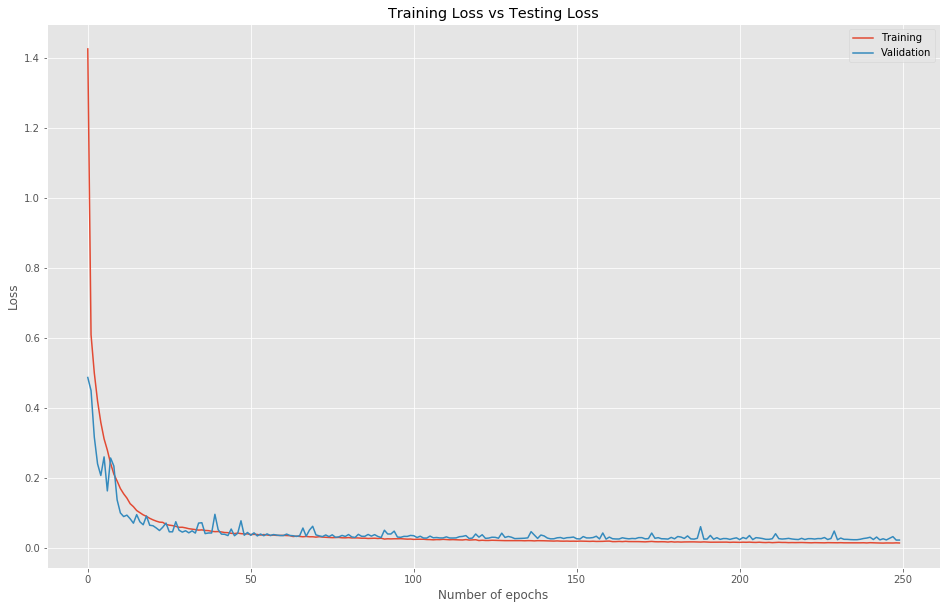

In [17]:
#El último valor del testing siempre venía erroneo, por lo que se reemplaza con el correcto
#evaluando el modelo con 250 epochs (modelo final)
test_loss[-1] = model.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss=history.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

**c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).**

Empleando como función de activación ’**ReLU**’ se obtienen los resultados mostrados abajo. Cabe resaltar que con un learning rate de 0.01 se observa divergencia durante el entrenamiento, por lo que se realiazo el entrenamiento con un learning rate de 0.001.


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 475us/step - loss: 9.0714 - val_loss: 4.3900

Testing loss: 2.0216636184326293
Epoch 2/250
9745/9745 [==============================] - 4s 424us/step - loss: 2.1581 - val_loss: 6.6564

Testing loss: 2.9105904012319246
Epoch 3/250
9745/9745 [==============================] - 4s 447us/step - loss: 0.9595 - val_loss: 1.7998

Testing loss: 0.7053908525805983
Epoch 4/250
9745/9745 [==============================] - 4s 455us/step - loss: 0.9715 - val_loss: 1.9925

Testing loss: 0.6426319913830872
Epoch 5/250
9745/9745 [==============================] - 5s 475us/step - loss: 0.6854 - val_loss: 1.3259

Testing loss: 0.4002278416716006
Epoch 6/250
9745/9745 [==============================] - 4s 429us/step - loss: 0.4779 - val_loss: 1.2746

Testing loss: 0.3375346348710759
Epoch 7/250
9745/9745 [==============================] - 4s 458us/step - loss: 0.4251 - val_loss: 1.5010

Testing loss

9745/9745 [==============================] - 5s 485us/step - loss: 0.0664 - val_loss: 0.3937

Testing loss: 0.12135567356192972
Epoch 60/250
9745/9745 [==============================] - 4s 460us/step - loss: 0.0612 - val_loss: 0.3848

Testing loss: 0.10799685303751604
Epoch 61/250
9745/9745 [==============================] - 4s 381us/step - loss: 0.0595 - val_loss: 0.3663

Testing loss: 0.09369097135588068
Epoch 62/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.0589 - val_loss: 0.3731

Testing loss: 0.12033320814760912
Epoch 63/250
9745/9745 [==============================] - 4s 371us/step - loss: 0.0590 - val_loss: 0.3699

Testing loss: 0.08632502323692946
Epoch 64/250
9745/9745 [==============================] - 4s 448us/step - loss: 0.0600 - val_loss: 0.3671

Testing loss: 0.08879914171122409
Epoch 65/250
9745/9745 [==============================] - 4s 377us/step - loss: 0.0575 - val_loss: 0.3730

Testing loss: 0.09618080530283536
Epoch 66/250
9745/9745 [==

9745/9745 [==============================] - 12s 1ms/step - loss: 0.0266 - val_loss: 0.3415

Testing loss: 0.0673073799566052
Epoch 176/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0263 - val_loss: 0.3209

Testing loss: 0.05490566125949008
Epoch 177/250
9745/9745 [==============================] - 12s 1ms/step - loss: 0.0263 - val_loss: 0.3196

Testing loss: 0.05770744211315592
Epoch 178/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0276 - val_loss: 0.3256

Testing loss: 0.056775415642922655
Epoch 179/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0261 - val_loss: 0.3456

Testing loss: 0.062422912113466344
Epoch 180/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0271 - val_loss: 0.3214

Testing loss: 0.0780306784424642
Epoch 181/250
9745/9745 [==============================] - 11s 1ms/step - loss: 0.0269 - val_loss: 0.3565

Testing loss: 0.0681993476996809
Epoch 182/250
9745/9745 [===

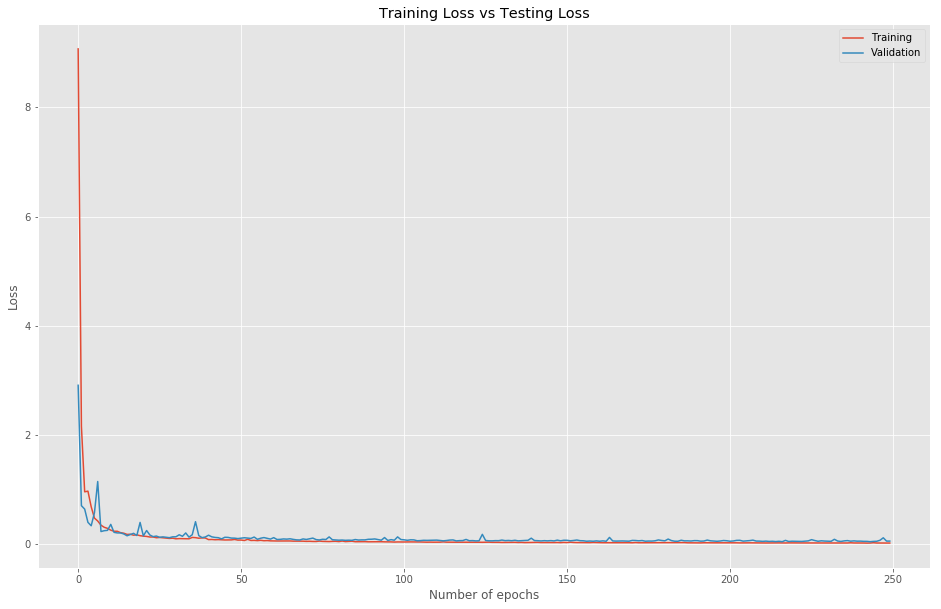

In [10]:
model2 = Sequential()
model2.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="relu"))
model2.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model2.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error') #, metrics=['accuracy']

history = model2.fit(xTrainScaled.values,
                    yTrain,
                    epochs=numEpochs,
                    verbose=1,
                    validation_data=(xValScaled.values, yVal), 
                    callbacks=[TestCallback((xTestScaled.values, yTest))])

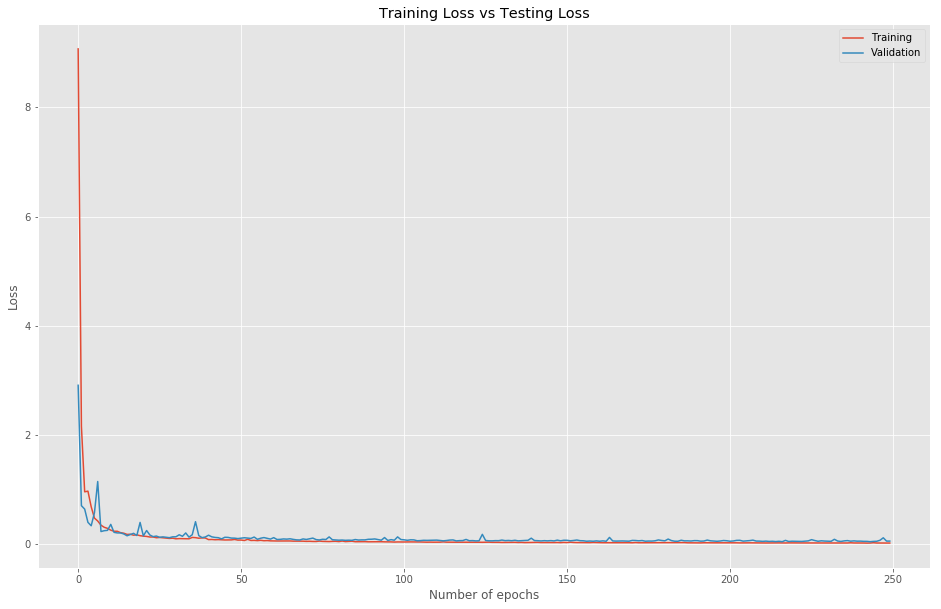

In [11]:
test_loss[-1] = model2.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = history.history['loss']
xc = range(numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

**d) Repita b) y c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**


En el entrenamiento se observa variando el learning rate en rangos sensibles, que con valores grandes se produce divergencia. Esto porque con valores muy grandes la optimización se hace inestable rebotando alrededor del optimo, los cambios en los pesos pueden ser tan grandes que sobrepasan el mínimo y empeoran la perdida en vez de mejorar.
En el caso que el valor sea demasiado pequeño, la optimizacion debera ejecutarse demasiadas veces sin garantizar que encuentre un optimo además de tardar mucho tiempo. Por lo que se recomienda utilizar diferente valores, con el fin de obtener la mejor perdida sin sacrificar la velocidad de entrenamiento. Cunado se entrena con un learning rate pequeño, en algún punto el valor de la función de perdida empezara a disminuir en la primeras iteraciones. Este learning rate es el máximo que se debe usar, cualquier otro valor por encima de este hará que el entrenamiento no converga.


In [8]:
def iterateOverLearningRate(n_lr, activ):
    lear_rate = np.linspace(0,1,n_lr)
    histories = np.ndarray((20, ), object)

    for i in range (n_lr):
        model = Sequential()
        model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
        model.compile(optimizer=SGD(lear_rate[i]),loss='mean_squared_error')
        histories[i] = model.fit(xTrainScaled.values,
                        yTrain,
                        epochs=250,
                        verbose=1,
                        validation_data=(xValScaled.values, yVal), 
                        callbacks=[TestCallback((xTestScaled.values, yTest))])
    return histories

In [11]:
histories = iterateOverLearningRate(20, "sigmoid")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 470us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 2/250
9745/9745 [==============================] - 4s 428us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 3/250
9745/9745 [==============================] - 4s 360us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 4/250
9745/9745 [==============================] - 4s 381us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 5/250
9745/9745 [==============================] - 4s 376us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 6/250
9745/9745 [==============================] - 5s 521us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 7/250
9745/9745 [==============================] - 10s 1ms/step - loss: 134.3590 - val_l

9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 59/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 60/250
9745/9745 [==============================] - 12s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 61/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 62/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 63/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 64/250
9745/9745 [==============================] - 11s 1ms/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 65/250


Testing loss: 119.67663852220487
Epoch 172/250
9745/9745 [==============================] - 7s 740us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 173/250
9745/9745 [==============================] - 8s 832us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 174/250
9745/9745 [==============================] - 7s 767us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 175/250
9745/9745 [==============================] - 8s 831us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 176/250
9745/9745 [==============================] - 8s 852us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 177/250
9745/9745 [==============================] - 7s 712us/step - loss: 134.3590 - val_loss: 153.7227

Testing loss: 119.67663852220487
Epoch 178/250
9745/9745 [==============================] - 8s 805us/step - loss: 134.3590 - val_

9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 43/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 44/250
9745/9745 [==============================] - 14s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 45/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 11s 1ms/ste

9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 180/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 181/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 182/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 66/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 67/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 68/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 5s 475us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 5s 


Testing loss: nan
Epoch 134/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 135/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 4s 441us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/97

9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 203/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 4s 384us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 367us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 317us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 90/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 91/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 3s 335us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 319us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 318us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 226/250
9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 227/250
9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 395us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 5s 521us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 6s 587us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 451us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 469us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 113/250
9745/9745 [==============================] - 5s 488us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 5s 501us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 5s 501us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 5s 512us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 5s 470us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 5s 474us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 5s 486us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 494us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 249/250
9745/9745 [==============================] - 5s 529us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 5s 519us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 530us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 5s 462us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 5s 500us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 5s 516us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745


Testing loss: nan
Epoch 135/250
9745/9745 [==============================] - 5s 543us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 5s 523us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 5s 557us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 5s 549us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 5s 561us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 5s 531us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 447us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 3s 325us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/97

9745/9745 [==============================] - 3s 316us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 3s 350us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 3s 309us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 3s 314us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 91/250
9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 348us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 7s 758us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 227/250
9745/9745 [==============================] - 7s 701us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 7s 727us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 7s 722us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 7s 734us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 7s 769us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 7s 728us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 7s 735us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [=============================

9745/9745 [==============================] - 7s 675us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 7s 718us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 8s 786us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 

9745/9745 [==============================] - 8s 857us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 9s 923us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 9s 949us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 8s 870us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 9s 881us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 8s 853us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 8s 851us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 9s 879us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9


Testing loss: nan
Epoch 68/250
9745/9745 [==============================] - 8s 776us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 7s 760us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 8s 787us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 7s 742us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 9s 903us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [========

9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 3s 332us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 423us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [=============================


Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 451us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 5s 497us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/97

9745/9745 [==============================] - 4s 369us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 459us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 4s 399us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 5s 532us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 4s 417us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 7s 701us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 7s 756us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 6s 629us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 7s 708us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 7s 711us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 6s 662us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 7s 708us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 7s 711us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 429us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 405us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 416us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [=============================


Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/97

9745/9745 [==============================] - 4s 396us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 183/250
9745/9745 [==============================] - 4s 456us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 4s 382us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s 301us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [=============================


Testing loss: nan
Epoch 69/250
9745/9745 [==============================] - 9s 875us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 70/250
9745/9745 [==============================] - 9s 972us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 9s 878us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 9s 902us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 9s 874us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 9s 925us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 8s 845us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 9s 875us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [=====

9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 10s 995us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 9

9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 3s 317us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 435us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 3s

9745/9745 [==============================] - 3s 332us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 4s 400us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 424us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [=============================


Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 328us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/97

9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 4s 447us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 410us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250
9745/9745 [==============================] - 4s 371us/st

9745/9745 [==============================] - 4s 428us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 3s 341us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [==============================] - 3s 333us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 78/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 330us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 214/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 411us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 3s 310us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 3s 348us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 101/250
9745/9745 [==============================] - 3

9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 302us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 237/250
9745/9745 [=============================


Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 390us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 409us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 384us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 124/250
9745/97

9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 308us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 4s 410us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 337us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 3s 329us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [==============================] - 3s 350us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 192/250
9745/9745 [=============================

In [ ]:
histories = iterateOverLearningRate(20, "relu")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 530us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 2/250
9745/9745 [==============================] - 5s 471us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 3/250
9745/9745 [==============================] - 4s 414us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 4/250
9745/9745 [==============================] - 3s 309us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 5/250
9745/9745 [==============================] - 4s 361us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 6/250
9745/9745 [==============================] - 3s 310us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 7/250
9745/9745 [==============================] - 3s 331us/step - loss: 134.6933 - val_loss: 

9745/9745 [==============================] - 3s 356us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 59/250
9745/9745 [==============================] - 3s 310us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 60/250
9745/9745 [==============================] - 4s 401us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 61/250
9745/9745 [==============================] - 3s 334us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 62/250
9745/9745 [==============================] - 3s 309us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 63/250
9745/9745 [==============================] - 3s 358us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 64/250
9745/9745 [==============================] - 4s 407us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 65/250

9745/9745 [==============================] - 3s 297us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 173/250
9745/9745 [==============================] - 3s 342us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 174/250
9745/9745 [==============================] - 3s 354us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 175/250
9745/9745 [==============================] - 3s 318us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 176/250
9745/9745 [==============================] - 3s 327us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 177/250
9745/9745 [==============================] - 4s 366us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 178/250
9745/9745 [==============================] - 3s 310us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 

9745/9745 [==============================] - 4s 368us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 230/250
9745/9745 [==============================] - 3s 309us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 231/250
9745/9745 [==============================] - 4s 389us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 232/250
9745/9745 [==============================] - 4s 379us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 233/250
9745/9745 [==============================] - 4s 425us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 234/250
9745/9745 [==============================] - 3s 357us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 235/250
9745/9745 [==============================] - 3s 313us/step - loss: 134.6933 - val_loss: 154.1218

Testing loss: 119.7235010559558
Epoch 

9745/9745 [==============================] - 4s 424us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 44/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 45/250
9745/9745 [==============================] - 4s 426us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 46/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 47/250
9745/9745 [==============================] - 4s 382us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 48/250
9745/9745 [==============================] - 3s 308us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 49/250
9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 50/250
9745/9745 [==============================] - 3s 343us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 51/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 113/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 3s 338us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 342us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [=============================

9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 249/250
9745/9745 [==============================] - 4s 387us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 348us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745


Testing loss: nan
Epoch 135/250
9745/9745 [==============================] - 3s 313us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 3s 312us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 4s 400us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/97

9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 327us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 5s 513us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 3s 333us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 347us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 359us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 91/250
9745/9745 [==============================] - 5s 475us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 336us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 227/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 5s 484us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 360us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [=============================

9745/9745 [==============================] - 5s 477us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 114/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 459us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 4s 427us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 374us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 436us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 250/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 421us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 439us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s 438us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9


Testing loss: nan
Epoch 136/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 4s 423us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 5s 484us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 426us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 5s 520us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 4s 403us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 5s 463us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/97

9745/9745 [==============================] - 4s 361us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 205/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 5s 465us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 445us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 92/250
9745/9745 [==============================] - 4s 453us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 5s 490us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 382us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 5s 522us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 5s 482us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 228/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 10s 997us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 9s 919us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 9s 952us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 9s 914us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 10s 976us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 9s 921us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [=============================

9745/9745 [==============================] - 9s 955us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 9s 948us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 10s 995us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 10s 998us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 10s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 9s 964us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 9s 952us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [=============================

9745/9745 [==============================] - 7s 724us/step - loss: nan - val_loss: nan

Testing loss: nan
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 11s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 8s 780us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 8s 806us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 8s 821us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 7s 768us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 8s 781us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 


Testing loss: nan
Epoch 137/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 4s 360us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 3s 356us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 4s 371us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/97

9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 206/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 4s 402us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 4s 421us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 4s 394us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 93/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 451us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 5s 509us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 5s 477us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 450us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 448us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 383us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 4s

9745/9745 [==============================] - 4s 408us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 229/250
9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 424us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 3s 349us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 354us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 4s 388us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [=============================


Testing loss: nan
Epoch 115/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 4s 420us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 386us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 394us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 402us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 5s 497us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/97

9745/9745 [==============================] - 4s 430us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 184/250
9745/9745 [==============================] - 4s 461us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 5s 488us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 440us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 412us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 5s 518us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 5s 528us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [=============================

9745/9745 [==============================] - 6s 628us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 5s 560us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 6s 599us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 5s 554us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 5s 534us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 6s 585us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 5s 556us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 5s 541us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250
9745/9745 [==============================] - 5s 549us/st

9745/9745 [==============================] - 5s 513us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 71/250
9745/9745 [==============================] - 5s 528us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 72/250
9745/9745 [==============================] - 5s 539us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 5s 538us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 5s 555us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 5s 551us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 5s 536us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [==============================] - 5s 563us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 78/250
9745/9745 [==============================] - 5s 

9745/9745 [==============================] - 5s 560us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 207/250
9745/9745 [==============================] - 5s 533us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 208/250
9745/9745 [==============================] - 5s 560us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 5s 492us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 5s 525us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 5s 553us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 5s 521us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 5s 463us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 214/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 94/250
9745/9745 [==============================] - 4s 384us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 4s 393us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 457us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 433us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 414us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 101/250
9745/9745 [==============================] - 3

9745/9745 [==============================] - 5s 467us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 230/250
9745/9745 [==============================] - 4s 443us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 4s 449us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 4s 427us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 455us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [==============================] - 5s 528us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 237/250
9745/9745 [=============================


Testing loss: nan
Epoch 116/250
9745/9745 [==============================] - 3s 335us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 3s 353us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 417us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 381us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/9745 [==============================] - 4s 365us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 124/250
9745/97

9745/9745 [==============================] - 4s 410us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 185/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 3s 352us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 192/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 385us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 5s 481us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s 379us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s 412us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 443us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s 378us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 353us/s

9745/9745 [==============================] - 8s 825us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 8s 859us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 8s 869us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 8s 847us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 8s 864us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 7s 766us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/9745 [==============================] - 8s 776us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 146/250
9745/9745 [==============================] - 8s 821us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 147/250
9745/9745 [=============================

9745/9745 [==============================] - 8s 815us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 26/250
9745/9745 [==============================] - 8s 786us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 27/250
9745/9745 [==============================] - 8s 817us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 28/250
9745/9745 [==============================] - 7s 744us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 29/250
9745/9745 [==============================] - 8s 778us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 30/250
9745/9745 [==============================] - 8s 828us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 31/250
9745/9745 [==============================] - 7s 729us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 32/250
9745/9745 [==============================] - 7s 753us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 33/250
9745/9745 [==============================] - 8s 

9745/9745 [==============================] - 8s 847us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 95/250
9745/9745 [==============================] - 8s 827us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 8s 814us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 8s 872us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 8s 825us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 8s 835us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 8s 859us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 101/250
9745/9745 [==============================] - 8s 810us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 102/250
9745/9745 [==============================] - 

9745/9745 [==============================] - 4s 456us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 231/250
9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 3s 309us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 3s 356us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 3s 347us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 237/250
9745/9745 [==============================] - 3s 331us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 238/250
9745/9745 [=============================


Testing loss: nan
Epoch 117/250
9745/9745 [==============================] - 4s 424us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 118/250
9745/9745 [==============================] - 4s 370us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 119/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 120/250
9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 121/250
9745/9745 [==============================] - 4s 397us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 122/250
9745/9745 [==============================] - 4s 406us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 123/250
9745/9745 [==============================] - 4s 394us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 124/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 125/250
9745/97

9745/9745 [==============================] - 4s 409us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 186/250
9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 187/250
9745/9745 [==============================] - 4s 398us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 188/250
9745/9745 [==============================] - 4s 377us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 189/250
9745/9745 [==============================] - 4s 415us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 190/250
9745/9745 [==============================] - 4s 437us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 191/250
9745/9745 [==============================] - 4s 434us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 192/250
9745/9745 [==============================] - 4s 408us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 193/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 419us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s 407us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 459us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 408us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 344us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 10/250
9745/9745 [==============================] - 4s 400us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 11/250
9745/9745 [==============================] - 4s 407us/

9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 73/250
9745/9745 [==============================] - 4s 372us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 74/250
9745/9745 [==============================] - 4s 364us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 75/250
9745/9745 [==============================] - 4s 460us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 76/250
9745/9745 [==============================] - 4s 436us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 77/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 78/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 79/250
9745/9745 [==============================] - 4s 453us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 80/250
9745/9745 [==============================] - 4s 

9745/9745 [==============================] - 3s 355us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 209/250
9745/9745 [==============================] - 5s 467us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 210/250
9745/9745 [==============================] - 4s 413us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 211/250
9745/9745 [==============================] - 4s 425us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 212/250
9745/9745 [==============================] - 4s 396us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 213/250
9745/9745 [==============================] - 3s 351us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 214/250
9745/9745 [==============================] - 4s 396us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 215/250
9745/9745 [==============================] - 5s 463us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 216/250
9745/9745 [=============================

9745/9745 [==============================] - 4s 376us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 96/250
9745/9745 [==============================] - 4s 362us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 97/250
9745/9745 [==============================] - 4s 404us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 98/250
9745/9745 [==============================] - 4s 380us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 99/250
9745/9745 [==============================] - 4s 427us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 100/250
9745/9745 [==============================] - 4s 453us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 101/250
9745/9745 [==============================] - 4s 373us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 102/250
9745/9745 [==============================] - 4s 389us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 103/250
9745/9745 [==============================] -

9745/9745 [==============================] - 5s 504us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 232/250
9745/9745 [==============================] - 5s 469us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 233/250
9745/9745 [==============================] - 5s 563us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 234/250
9745/9745 [==============================] - 4s 401us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 235/250
9745/9745 [==============================] - 5s 485us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 236/250
9745/9745 [==============================] - 5s 519us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 237/250
9745/9745 [==============================] - 5s 520us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 238/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 239/250
9745/9745 [=============================

**e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.**

¿Como seleccionar correctamentamente el learning rate?, si el es demasiado grande la optimizacion diverge, si es demasiado pequeño es muy lento y puede atorarse en un minimo local. La solución para esto es usar progressive decay. 


In [64]:
def iterateOverDecay(k,activ):
    n_decay=10
    lear_decay = np.logspace(-6,0,n_decay)
    # histories = np.ndarray((n_decay, ), object)
    #for i in range (n_decay):
    sgd = SGD(0.2, decay= lear_decay[k] )#decay=1e-6)
    model = Sequential()
    model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation=activ))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    model.compile(optimizer= sgd,loss='mean_squared_error') #, metrics=['accuracy'] 
    histories = model.fit(xTrainScaled.values,
                          yTrain,
                        epochs=250,
                        verbose=1,
                        validation_data=(xValScaled.values, yVal), 
                        callbacks=[TestCallback((xTestScaled.values, yTest))])
    return histories

In [23]:
histories = iterateOverDecay("sigmoid")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 12s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 13s 1ms/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 9s 950us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 8s 826us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 8s 798us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 9s 944us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/250


9745/9745 [==============================] - 8s 782us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 8s 795us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 8s 808us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 8s 798us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 8s 770us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 7s 760us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 7s 766us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 7s 760us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/9745 [=============================

In [24]:
histories = iterateOverDecay("relu")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 466us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 441us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 3/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 4/250
9745/9745 [==============================] - 4s 375us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 5/250
9745/9745 [==============================] - 4s 432us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 391us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 392us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 8/250
9745/9745 [==============================] - 4s 422us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 9/

9745/9745 [==============================] - 6s 619us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 138/250
9745/9745 [==============================] - 6s 646us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 139/250
9745/9745 [==============================] - 6s 581us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 140/250
9745/9745 [==============================] - 5s 515us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 141/250
9745/9745 [==============================] - 6s 584us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 142/250
9745/9745 [==============================] - 5s 468us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 143/250
9745/9745 [==============================] - 5s 544us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 144/250
9745/9745 [==============================] - 6s 620us/step - loss: nan - val_loss: nan

Testing loss: nan
Epoch 145/250
9745/9745 [=============================

In [66]:
histories = iterateOverDecay(9,"sigmoid")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 6s 574us/step - loss: 87915948447.5659 - val_loss: 347897514.8138

Testing loss: 334521107.5913008
Epoch 2/250
9745/9745 [==============================] - 4s 435us/step - loss: 305360394.6689 - val_loss: 319993332.9655

Testing loss: 290686773.46245384
Epoch 3/250
9745/9745 [==============================] - 5s 464us/step - loss: 290142044.2664 - val_loss: 328134125.4305

Testing loss: 307640967.15633976
Epoch 4/250
9745/9745 [==============================] - 4s 437us/step - loss: 266788433.3381 - val_loss: 293933676.3586

Testing loss: 272345153.54944605
Epoch 5/250
9745/9745 [==============================] - 5s 524us/step - loss: 248892875.0884 - val_loss: 275773321.3005

Testing loss: 255449262.6803447
Epoch 6/250
9745/9745 [==============================] - 5s 522us/step - loss: 233320127.5994 - val_loss: 255143239.9764

Testing loss: 238215810.83627412
Epoch 7/250
9745/9745 


Testing loss: 148261446.84776366
Epoch 106/250
9745/9745 [==============================] - 5s 505us/step - loss: 143195478.8384 - val_loss: 165485423.5586

Testing loss: 148110832.99138284
Epoch 107/250
9745/9745 [==============================] - 5s 464us/step - loss: 143036053.6431 - val_loss: 165377536.9931

Testing loss: 148050047.30406237
Epoch 108/250
9745/9745 [==============================] - 5s 490us/step - loss: 142885800.8094 - val_loss: 165163865.1113

Testing loss: 147827698.82970867
Epoch 109/250
9745/9745 [==============================] - 5s 462us/step - loss: 142794116.5324 - val_loss: 165007579.3182

Testing loss: 147679603.01354125
Epoch 110/250
9745/9745 [==============================] - 5s 525us/step - loss: 142622538.8207 - val_loss: 164853587.4837

Testing loss: 147519190.46696758
Epoch 111/250
9745/9745 [==============================] - 5s 505us/step - loss: 142515950.3466 - val_loss: 164697993.8365

Testing loss: 147390671.19901517
Epoch 112/250
9745/9745 

9745/9745 [==============================] - 5s 486us/step - loss: 137550741.8270 - val_loss: 159193824.1419

Testing loss: 142128101.30488306
Epoch 159/250
9745/9745 [==============================] - 5s 475us/step - loss: 137485517.1399 - val_loss: 159078828.1537

Testing loss: 142037449.34263438
Epoch 160/250
9745/9745 [==============================] - 5s 470us/step - loss: 137378716.3715 - val_loss: 159011819.2709

Testing loss: 141958353.2540008
Epoch 161/250
9745/9745 [==============================] - 5s 469us/step - loss: 137335565.8422 - val_loss: 158884321.6867

Testing loss: 141863874.61304882
Epoch 162/250
9745/9745 [==============================] - 5s 472us/step - loss: 137223267.7927 - val_loss: 158805185.1192

Testing loss: 141806741.00943783
Epoch 163/250
9745/9745 [==============================] - 5s 527us/step - loss: 137167259.2402 - val_loss: 158751714.9793

Testing loss: 141756542.3652031
Epoch 164/250
9745/9745 [==============================] - 5s 490us/step -

In [74]:
test_loss[-1] = histories.validation_data

#.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = histories.history['loss']
xc = range (numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

ValueError: setting an array element with a sequence.

> f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.
```python
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
```


**g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?**

In [5]:
#from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

model = Sequential()
model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
#model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
historyf= model.fit(xTrainScaled,yTrain,batch_size=50,epochs=250,validation_data=(xValScaled, yVal))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 459us/step - loss: 9.8129 - val_loss: 3.8061
Epoch 2/250
9745/9745 [==============================] - 3s 342us/step - loss: 1.9695 - val_loss: 1.7093
Epoch 3/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.9897 - val_loss: 0.9685
Epoch 4/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.6236 - val_loss: 0.6428
Epoch 5/250
9745/9745 [==============================] - 4s 401us/step - loss: 0.4470 - val_loss: 0.4736
Epoch 6/250
9745/9745 [==============================] - 4s 370us/step - loss: 0.3512 - val_loss: 0.3804
Epoch 7/250
9745/9745 [==============================] - 4s 378us/step - loss: 0.2925 - val_loss: 0.3149
Epoch 8/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.2498 - val_loss: 0.2698
Epoch 9/250
9745/9745 [==============================] - 4s 408us/step - loss: 0.2146 - val_loss: 0.2473
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.0465 - val_loss: 0.0840
Epoch 79/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.0462 - val_loss: 0.0830
Epoch 80/250
9745/9745 [==============================] - 3s 353us/step - loss: 0.0457 - val_loss: 0.0827
Epoch 81/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.0455 - val_loss: 0.0834
Epoch 82/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0452 - val_loss: 0.0828
Epoch 83/250
9745/9745 [==============================] - 3s 279us/step - loss: 0.0448 - val_loss: 0.0836
Epoch 84/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.0445 - val_loss: 0.0826
Epoch 85/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.0443 - val_loss: 0.0817
Epoch 86/250
9745/9745 [==============================] - 3s 295us/step - loss: 0.0440 - val_loss: 0.0829
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.0311 - val_loss: 0.0709
Epoch 156/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.0311 - val_loss: 0.0701
Epoch 157/250
9745/9745 [==============================] - 3s 287us/step - loss: 0.0310 - val_loss: 0.0706
Epoch 158/250
9745/9745 [==============================] - 3s 326us/step - loss: 0.0310 - val_loss: 0.0700
Epoch 159/250
9745/9745 [==============================] - 3s 288us/step - loss: 0.0308 - val_loss: 0.0695
Epoch 160/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.0306 - val_loss: 0.0697
Epoch 161/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0306 - val_loss: 0.0696
Epoch 162/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.0304 - val_loss: 0.0701
Epoch 163/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.0303 - val_loss: 0.0700
Epoch 164/250
9745/9745 [============

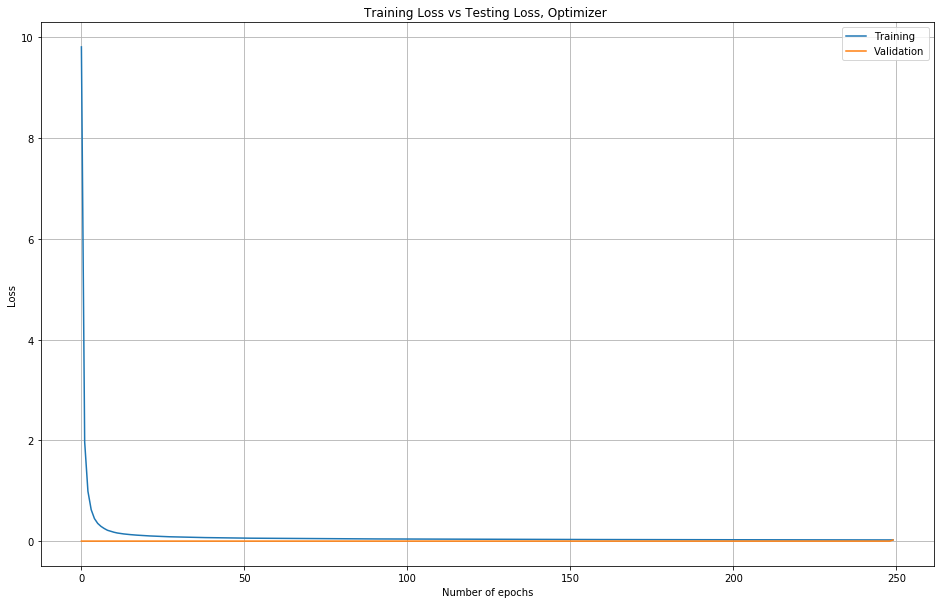

In [9]:
test_loss[-1] = model.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss= historyf.history['loss']
xc = range (numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss, Optimizer ')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 403us/step - loss: 2.9250 - val_loss: 0.5542
Epoch 2/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.8320 - val_loss: 0.8147
Epoch 3/250
9745/9745 [==============================] - 4s 375us/step - loss: 0.6478 - val_loss: 0.3993
Epoch 4/250
9745/9745 [==============================] - 4s 414us/step - loss: 0.6616 - val_loss: 0.5832
Epoch 5/250
9745/9745 [==============================] - 3s 355us/step - loss: 0.5738 - val_loss: 1.3216
Epoch 6/250
9745/9745 [==============================] - 3s 341us/step - loss: 0.5261 - val_loss: 0.8757
Epoch 7/250
9745/9745 [==============================] - 4s 363us/step - loss: 0.5296 - val_loss: 0.4495
Epoch 8/250
9745/9745 [==============================] - 4s 375us/step - loss: 0.4767 - val_loss: 0.4642
Epoch 9/250
9745/9745 [==============================] - 4s 360us/step - loss: 0.4840 - val_loss: 1.0252
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 355us/step - loss: 0.3200 - val_loss: 0.4460
Epoch 79/250
9745/9745 [==============================] - 3s 293us/step - loss: 0.3284 - val_loss: 0.4617
Epoch 80/250
9745/9745 [==============================] - 4s 385us/step - loss: 0.3310 - val_loss: 0.3314
Epoch 81/250
9745/9745 [==============================] - 3s 355us/step - loss: 0.3137 - val_loss: 0.4265
Epoch 82/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.3050 - val_loss: 0.1501
Epoch 83/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.3024 - val_loss: 0.1482
Epoch 84/250
9745/9745 [==============================] - 3s 341us/step - loss: 0.3020 - val_loss: 0.2580
Epoch 85/250
9745/9745 [==============================] - 4s 369us/step - loss: 0.3045 - val_loss: 0.3578
Epoch 86/250
9745/9745 [==============================] - 3s 345us/step - loss: 0.3035 - val_loss: 0.2327
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.2542 - val_loss: 0.1875
Epoch 156/250
9745/9745 [==============================] - 4s 369us/step - loss: 0.2527 - val_loss: 0.1306
Epoch 157/250
9745/9745 [==============================] - 4s 377us/step - loss: 0.2706 - val_loss: 0.1190
Epoch 158/250
9745/9745 [==============================] - 3s 337us/step - loss: 0.2487 - val_loss: 0.5660
Epoch 159/250
9745/9745 [==============================] - 3s 332us/step - loss: 0.2506 - val_loss: 0.2674
Epoch 160/250
9745/9745 [==============================] - 4s 365us/step - loss: 0.2644 - val_loss: 1.0430
Epoch 161/250
9745/9745 [==============================] - 4s 376us/step - loss: 0.2598 - val_loss: 0.9515
Epoch 162/250
9745/9745 [==============================] - 4s 373us/step - loss: 0.2588 - val_loss: 0.1730
Epoch 163/250
9745/9745 [==============================] - 3s 311us/step - loss: 0.2548 - val_loss: 0.1870
Epoch 164/250
9745/9745 [============

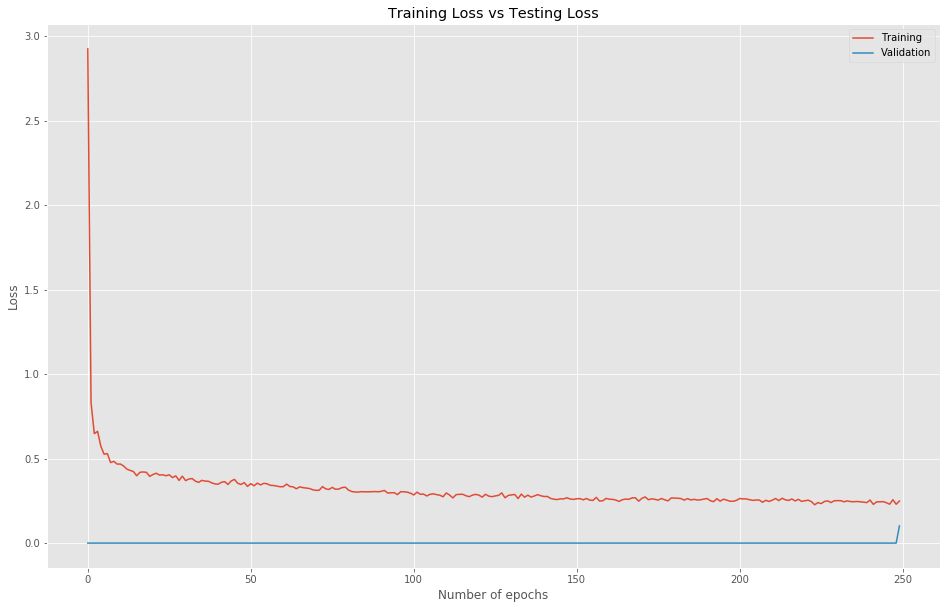

In [10]:

modelf = Sequential()
modelf.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
modelf.add(Dense(1, kernel_initializer='uniform',activation="linear"))
#model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']
moptimizer = RMSprop(lr=0.01)
modelf.compile(optimizer=moptimizer,loss='mean_squared_error')
historyfb= modelf.fit(xTrainScaled,yTrain,batch_size=50,epochs=250,validation_data=(xValScaled, yVal))

test_loss[-1] = modelf.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = historyfb.history['loss']
xc = range (numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 6s 638us/step - loss: 0.2583 - val_loss: 0.2291
Epoch 2/250
9745/9745 [==============================] - 5s 549us/step - loss: 0.2586 - val_loss: 0.7481
Epoch 3/250
9745/9745 [==============================] - 6s 594us/step - loss: 0.2497 - val_loss: 0.1931
Epoch 4/250
9745/9745 [==============================] - 5s 552us/step - loss: 0.2441 - val_loss: 0.3539
Epoch 5/250
9745/9745 [==============================] - 5s 522us/step - loss: 0.2578 - val_loss: 0.1685
Epoch 6/250
9745/9745 [==============================] - 5s 550us/step - loss: 0.2516 - val_loss: 0.8025
Epoch 7/250
9745/9745 [==============================] - 5s 561us/step - loss: 0.2545 - val_loss: 0.3850
Epoch 8/250
9745/9745 [==============================] - 6s 601us/step - loss: 0.2536 - val_loss: 0.2756
Epoch 9/250
9745/9745 [==============================] - 5s 526us/step - loss: 0.2586 - val_loss: 0.7817
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 4s 455us/step - loss: 0.2433 - val_loss: 0.1362
Epoch 79/250
9745/9745 [==============================] - 4s 421us/step - loss: 0.2376 - val_loss: 0.1523
Epoch 80/250
9745/9745 [==============================] - 5s 469us/step - loss: 0.2301 - val_loss: 0.3992
Epoch 81/250
9745/9745 [==============================] - 4s 436us/step - loss: 0.2364 - val_loss: 0.2445
Epoch 82/250
9745/9745 [==============================] - 4s 434us/step - loss: 0.2388 - val_loss: 0.1525
Epoch 83/250
9745/9745 [==============================] - 4s 448us/step - loss: 0.2426 - val_loss: 0.1214
Epoch 84/250
9745/9745 [==============================] - 4s 453us/step - loss: 0.2414 - val_loss: 0.1371
Epoch 85/250
9745/9745 [==============================] - 4s 452us/step - loss: 0.2440 - val_loss: 0.2367
Epoch 86/250
9745/9745 [==============================] - 5s 480us/step - loss: 0.2346 - val_loss: 0.1924
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 4s 417us/step - loss: 0.2331 - val_loss: 0.1235
Epoch 156/250
9745/9745 [==============================] - 4s 415us/step - loss: 0.2356 - val_loss: 0.3406
Epoch 157/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.2419 - val_loss: 0.1276
Epoch 158/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.2348 - val_loss: 0.1028
Epoch 159/250
9745/9745 [==============================] - 4s 456us/step - loss: 0.2366 - val_loss: 0.1237
Epoch 160/250
9745/9745 [==============================] - 4s 455us/step - loss: 0.2190 - val_loss: 0.3068
Epoch 161/250
9745/9745 [==============================] - 4s 412us/step - loss: 0.2363 - val_loss: 0.1375
Epoch 162/250
9745/9745 [==============================] - 4s 418us/step - loss: 0.2289 - val_loss: 0.4094
Epoch 163/250
9745/9745 [==============================] - 4s 423us/step - loss: 0.2327 - val_loss: 0.1976
Epoch 164/250
9745/9745 [============

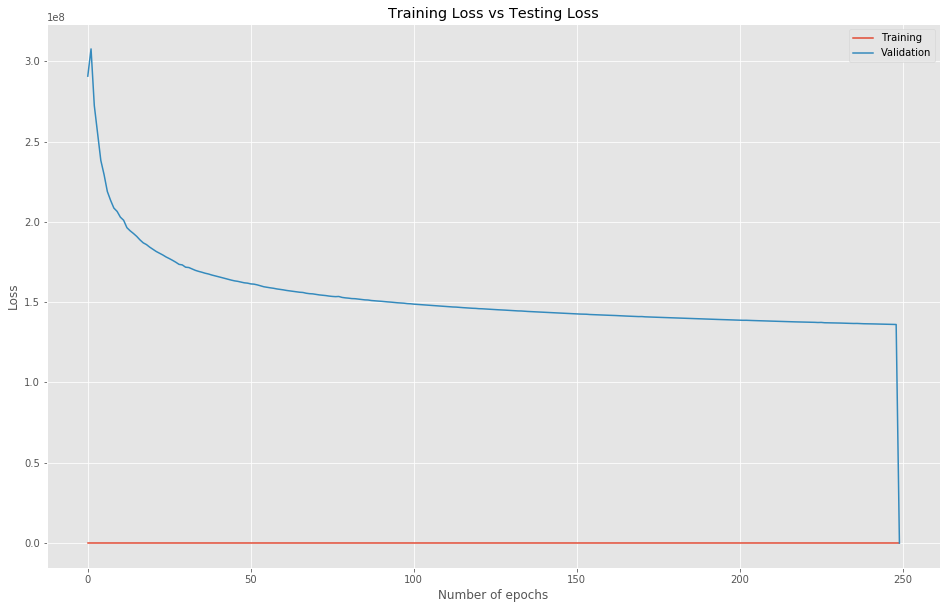

In [91]:
modelf1 = Sequential()
modelf1.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
modelf1.add(Dense(1, kernel_initializer='uniform',activation="linear"))
#model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error') #, metrics=['accuracy']
moptimizer = Adagrad(lr=0.01)
modelf1.compile(optimizer=moptimizer,loss='mean_squared_error')
historyf3= modelf.fit(xTrainScaled,yTrain,batch_size=50,epochs=250,validation_data=(xValScaled, yVal))

test_loss[-1] = modelf1.evaluate(xTestScaled.values, yTest, verbose=0)
train_loss = historyf3.history['loss']
xc = range (numEpochs)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,test_loss)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.title('Training Loss vs Testing Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])